In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

2022-02-05 19:43:06.585813: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-05 19:43:06.585873: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/home/vimalkumar/Documents/Stewart/CNN/Cnn'
#valid_path = '/home/vimalkumar/Documents/softco/CNN/CNN/test'

In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


2022-02-05 19:43:27.208830: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-05 19:43:27.208865: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-05 19:43:27.208891: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IG154): /proc/driver/nvidia/version does not exist
2022-02-05 19:43:27.209084: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
folders = glob('/home/vimalkumar/Documents/Stewart/CNN/Cnn/*')


In [6]:
x = Flatten()(inception.output)


In [7]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split=0.15)

#test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',
                                                subset = 'training')

Found 8330 images belonging to 2 classes.


In [11]:
test_set = train_datagen.flow_from_directory(train_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical',
                                           subset = 'validation')

Found 1469 images belonging to 2 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
)

/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-02-05 19:43:47.073095: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-02-05 19:43:54.956403: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 194658304 exceeds 10% of free system memory.


  1/131 [..............................] - ETA: 20:44 - loss: 0.8006 - accuracy: 0.3594

2022-02-05 19:44:02.733528: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 194658304 exceeds 10% of free system memory.


  2/131 [..............................] - ETA: 16:23 - loss: 1.0350 - accuracy: 0.5391

2022-02-05 19:44:08.678514: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 194658304 exceeds 10% of free system memory.


  3/131 [..............................] - ETA: 14:34 - loss: 0.8114 - accuracy: 0.6667

2022-02-05 19:44:14.234700: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 194658304 exceeds 10% of free system memory.


  4/131 [..............................] - ETA: 13:30 - loss: 0.7694 - accuracy: 0.7031

2022-02-05 19:44:19.644115: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 194658304 exceeds 10% of free system memory.


131/131 [==============================] - 981s 7s/step - loss: 0.1448 - accuracy: 0.9623 - val_loss: 0.0611 - val_accuracy: 0.9816
Epoch 2/5
131/131 [==============================] - 989s 8s/step - loss: 0.0929 - accuracy: 0.9771 - val_loss: 0.0859 - val_accuracy: 0.9816
Epoch 3/5
131/131 [==============================] - 850s 7s/step - loss: 0.0848 - accuracy: 0.9800 - val_loss: 0.1167 - val_accuracy: 0.9789
Epoch 4/5
131/131 [==============================] - 843s 6s/step - loss: 0.0691 - accuracy: 0.9842 - val_loss: 0.0559 - val_accuracy: 0.9884
Epoch 5/5
131/131 [==============================] - 757s 6s/step - loss: 0.0590 - accuracy: 0.9866 - val_loss: 0.0944 - val_accuracy: 0.9796


In [13]:
model.save('stewart_inception_model_1.h5')

In [26]:
#model = keras.models.load_model('stewart_inception_model.h5')

In [14]:
import os
import keras
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

In [15]:
dic = {0:'Blank',1:'Not Blank'}

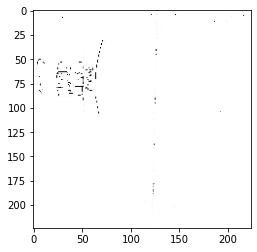

[[0.00413215 0.99993503]]
Not Blank


In [19]:
path = '/home/vimalkumar/Downloads/new_project (copy)/cnn validation/testing-2/31.jpeg'


img = image.load_img(path, 
                     target_size=(224,224))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
val = model.predict(images)
print(val)
    
a=np.argmax(val,axis=1)
print(dic[a[0]])

test_0.jpeg


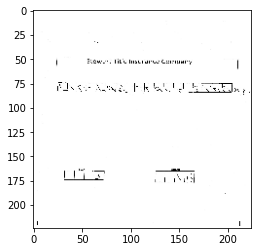

[[0.00172853 0.9979166 ]]
Not Blank
test_1.jpeg


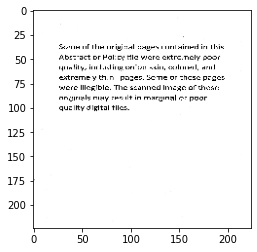

[[4.9283364e-07 9.9999833e-01]]
Not Blank
test_10.jpeg


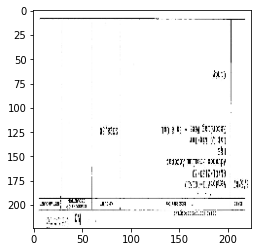

[[5.5763125e-04 9.9982893e-01]]
Not Blank
test_100.jpeg


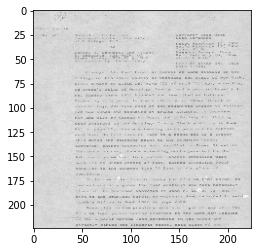

[[3.1507454e-06 9.9998981e-01]]
Not Blank
test_101.jpeg


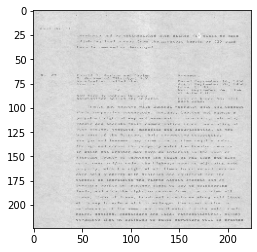

[[4.6267314e-06 9.9998796e-01]]
Not Blank
test_102.jpeg


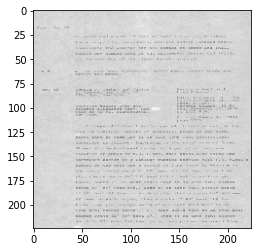

[[1.818914e-08 1.000000e+00]]
Not Blank
test_103.jpeg


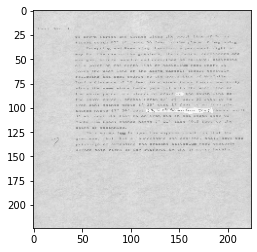

[[2.3645163e-04 9.9989319e-01]]
Not Blank
test_104.jpeg


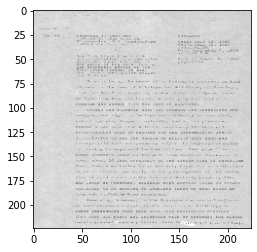

[[1.3038832e-05 9.9996221e-01]]
Not Blank
test_105.jpeg


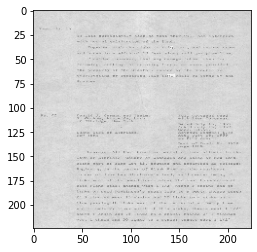

[[0.00321174 0.99860156]]
Not Blank
test_106.jpeg


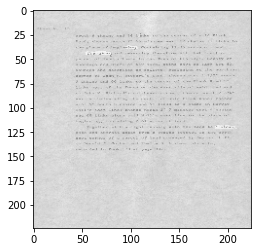

[[7.8606776e-05 9.9996001e-01]]
Not Blank
test_107.jpeg


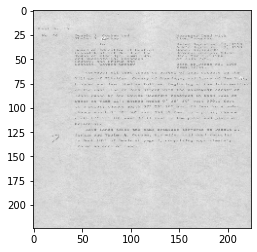

[[6.889764e-07 1.000000e+00]]
Not Blank
test_108.jpeg


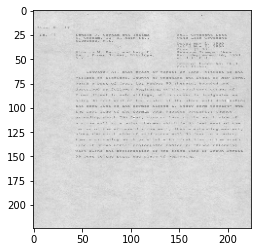

[[3.8520075e-06 9.9999869e-01]]
Not Blank
test_109.jpeg


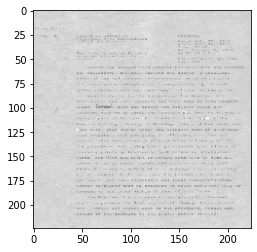

[[1.4143371e-05 9.9998391e-01]]
Not Blank
test_11.jpeg


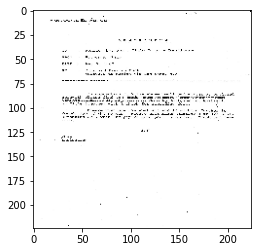

[[5.4533507e-07 9.9999940e-01]]
Not Blank
test_110.jpeg


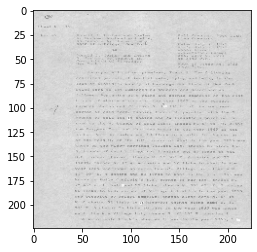

[[9.6139614e-05 9.9991900e-01]]
Not Blank
test_111.jpeg


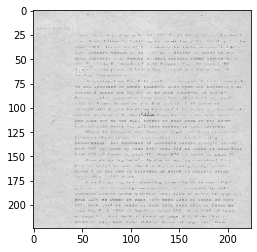

[[0.34099525 0.86658967]]
Not Blank
test_112.jpeg


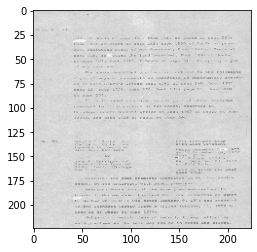

[[1.21255514e-04 9.99969482e-01]]
Not Blank
test_113.jpeg


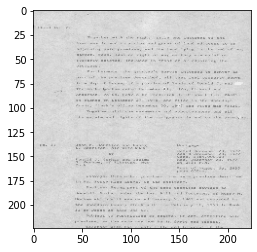

[[5.5429013e-05 9.9997401e-01]]
Not Blank
test_114.jpeg


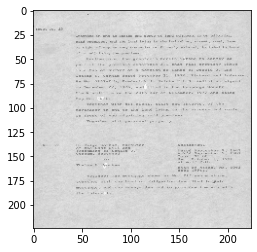

[[1.5459826e-05 9.9997717e-01]]
Not Blank
test_115.jpeg


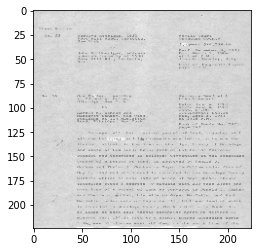

[[3.6288401e-07 9.9999946e-01]]
Not Blank
test_116.jpeg


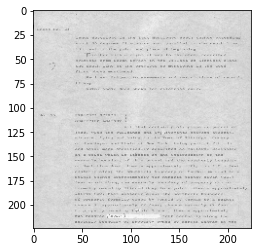

[[1.3256073e-04 9.9986982e-01]]
Not Blank
test_117.jpeg


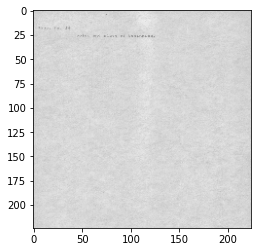

[[0.06252307 0.98682415]]
Not Blank
test_12.jpeg


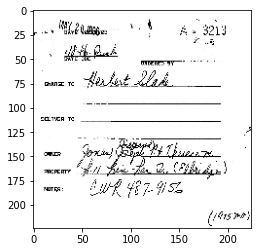

[[2.0461789e-07 1.0000000e+00]]
Not Blank
test_13.jpeg


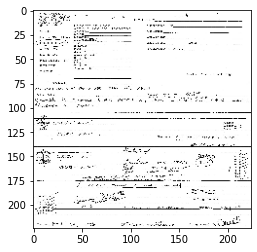

[[5.753866e-08 1.000000e+00]]
Not Blank
test_14.jpeg


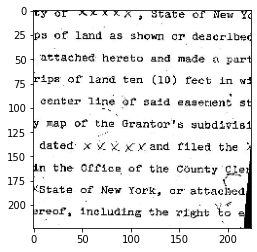

[[6.8603185e-05 9.9980450e-01]]
Not Blank
test_15.jpeg


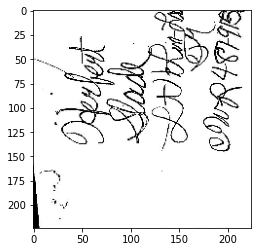

[[0.0064705  0.98933846]]
Not Blank
test_16.jpeg


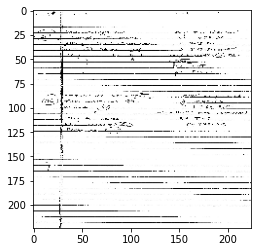

[[0.00333649 0.9998586 ]]
Not Blank
test_17.jpeg


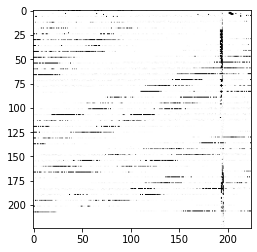

[[0.9943625  0.18959767]]
Blank
test_18.jpeg


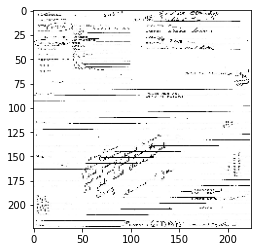

[[1.621199e-07 1.000000e+00]]
Not Blank
test_19.jpeg


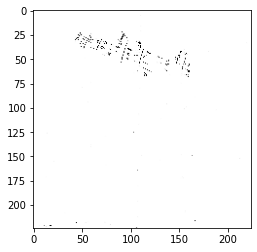

[[0.40512636 0.85665035]]
Not Blank
test_2.jpeg


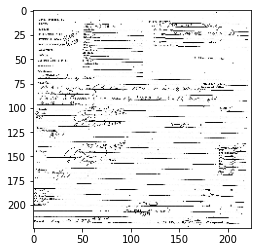

[[1.0062683e-07 1.0000000e+00]]
Not Blank
test_20.jpeg


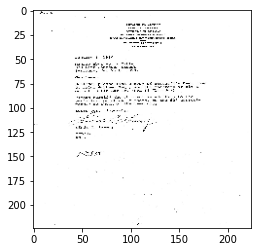

[[5.069838e-10 1.000000e+00]]
Not Blank
test_21.jpeg


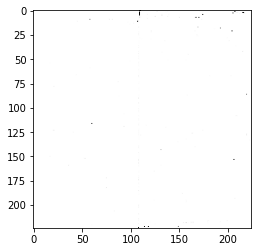

[[9.999998e-01 8.027799e-06]]
Blank
test_22.jpeg


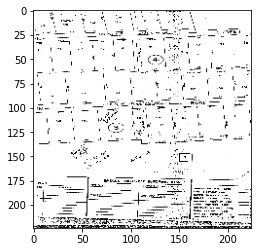

[[1.3337133e-05 9.9999577e-01]]
Not Blank
test_23.jpeg


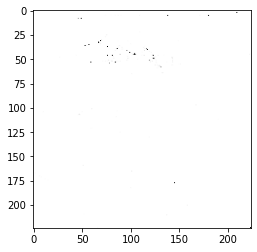

[[0.999079   0.00704744]]
Blank
test_24.jpeg


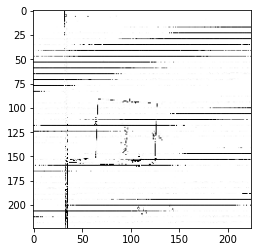

[[0.5754812 0.840323 ]]
Not Blank
test_25.jpeg


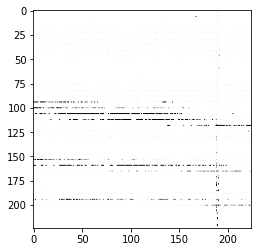

[[0.9999036  0.03209233]]
Blank
test_26.jpeg


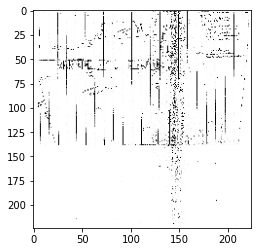

[[0.02353391 0.9983431 ]]
Not Blank
test_27.jpeg


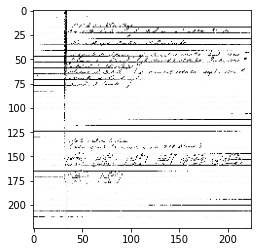

[[7.1861245e-07 1.0000000e+00]]
Not Blank
test_28.jpeg


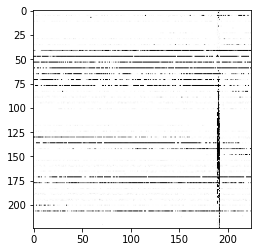

[[0.40047324 0.8642131 ]]
Not Blank
test_29.jpeg


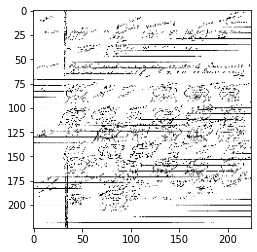

[[5.1637295e-07 1.0000000e+00]]
Not Blank
test_3.jpeg


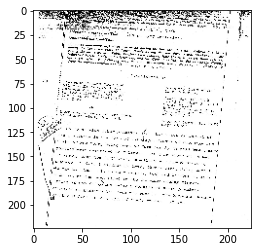

[[4.715772e-08 1.000000e+00]]
Not Blank
test_30.jpeg


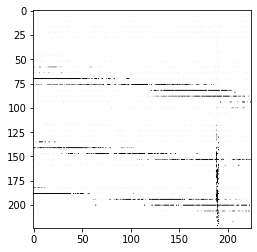

[[0.99895453 0.07539457]]
Blank
test_31.jpeg


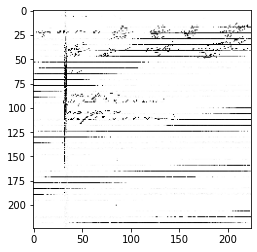

[[0.00286582 0.9999702 ]]
Not Blank
test_32.jpeg


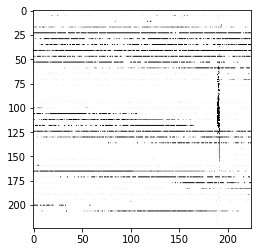

[[0.82418084 0.37987614]]
Blank
test_33.jpeg


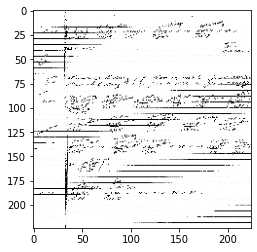

[[4.9283244e-08 1.0000000e+00]]
Not Blank
test_34.jpeg


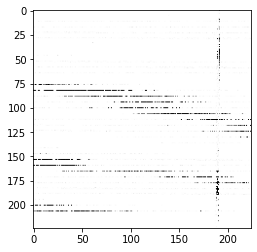

[[0.99618125 0.2729882 ]]
Blank
test_35.jpeg


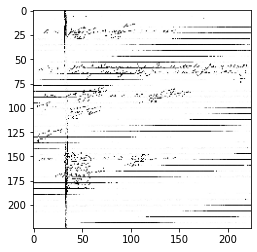

[[2.5310277e-05 9.9999964e-01]]
Not Blank
test_36.jpeg


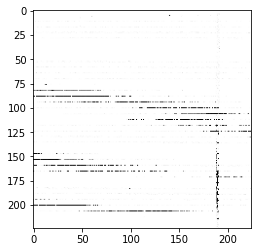

[[0.9989213  0.10374892]]
Blank
test_37.jpeg


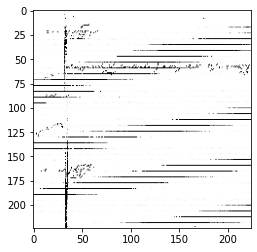

[[0.34477162 0.959787  ]]
Not Blank
test_38.jpeg


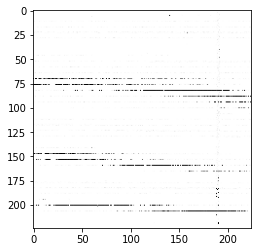

[[0.99916434 0.04856306]]
Blank
test_39.jpeg


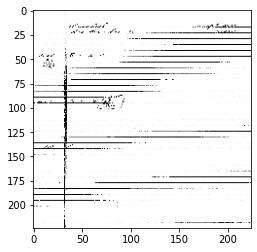

[[0.89039946 0.92736757]]
Not Blank
test_4.jpeg


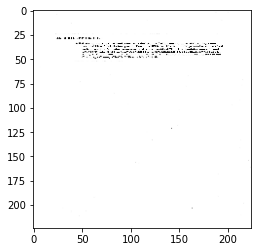

[[4.9283695e-05 9.9998689e-01]]
Not Blank
test_40.jpeg


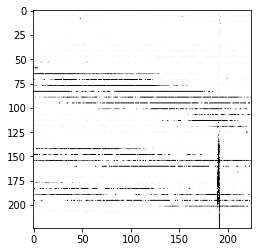

[[0.8662044  0.42457086]]
Blank
test_41.jpeg


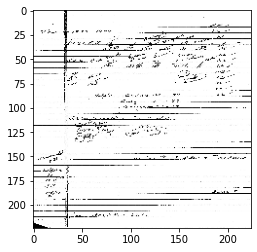

[[5.4214258e-08 1.0000000e+00]]
Not Blank
test_42.jpeg


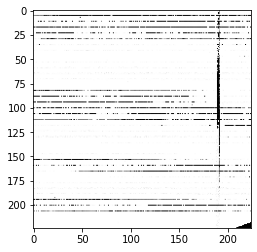

[[0.8564416 0.408001 ]]
Blank
test_43.jpeg


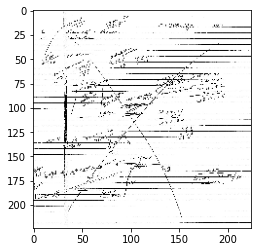

[[1.0103468e-08 1.0000000e+00]]
Not Blank
test_44.jpeg


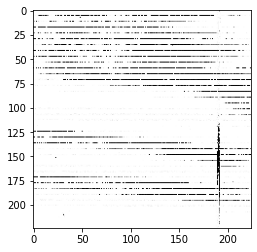

[[0.06577471 0.97124046]]
Not Blank
test_45.jpeg


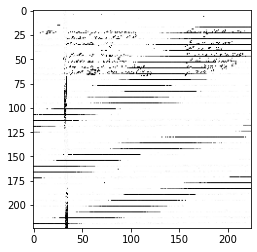

[[0.0092259 0.9964203]]
Not Blank
test_46.jpeg


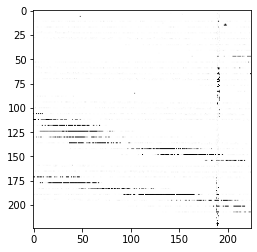

[[0.9996983  0.00787431]]
Blank
test_47.jpeg


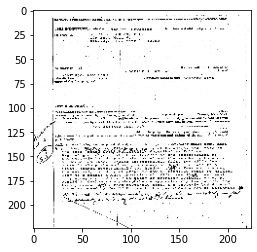

[[6.0340577e-09 1.0000000e+00]]
Not Blank
test_48.jpeg


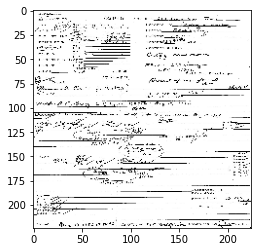

[[4.1618887e-06 9.9999905e-01]]
Not Blank
test_49.jpeg


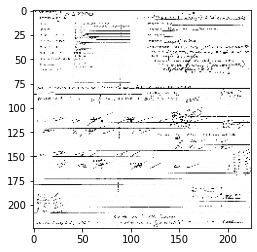

[[3.7403716e-08 1.0000000e+00]]
Not Blank
test_5.jpeg


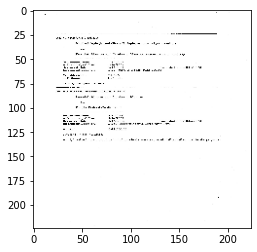

[[3.3517594e-05 9.9997580e-01]]
Not Blank
test_50.jpeg


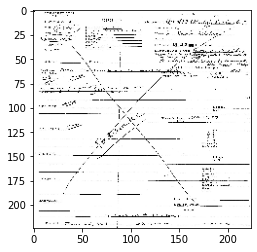

[[1.1148311e-05 9.9999869e-01]]
Not Blank
test_52.jpeg


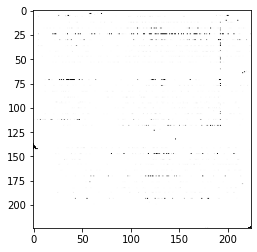

[[0.99235076 0.02274647]]
Blank
test_53.jpeg


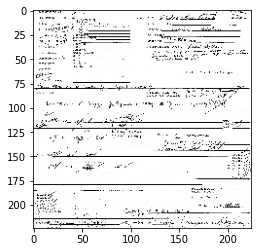

[[4.257979e-07 1.000000e+00]]
Not Blank
test_54.jpeg


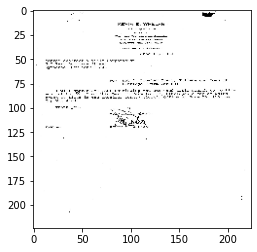

[[7.024767e-11 1.000000e+00]]
Not Blank
test_55.jpeg


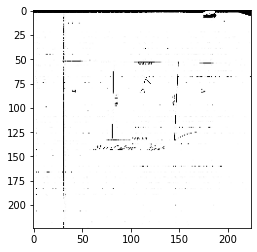

[[0.46754822 0.9330617 ]]
Not Blank
test_56.jpeg


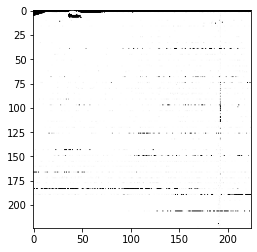

[[1.00000e+00 4.50221e-05]]
Blank
test_57.jpeg


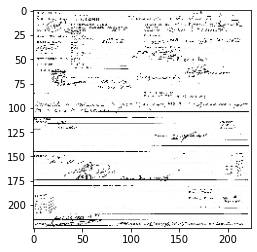

[[2.640721e-06 1.000000e+00]]
Not Blank
test_58.jpeg


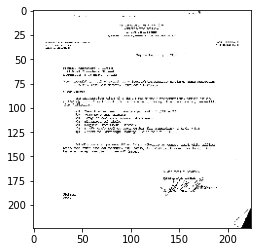

[[2.230498e-08 1.000000e+00]]
Not Blank
test_59.jpeg


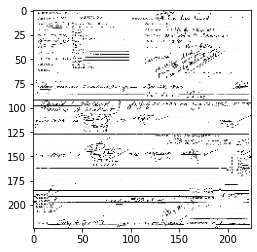

[[1.0163986e-06 1.0000000e+00]]
Not Blank
test_6.jpeg


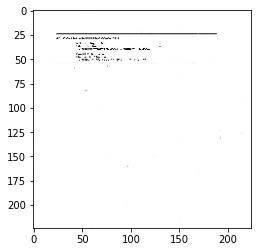

[[1.7789006e-04 9.9995673e-01]]
Not Blank
test_60.jpeg


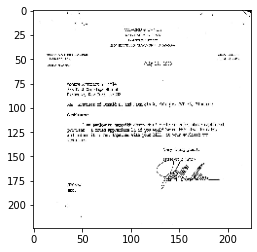

[[1.0684444e-08 1.0000000e+00]]
Not Blank
test_61.jpeg


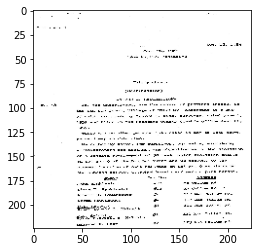

[[1.2029943e-09 1.0000000e+00]]
Not Blank
test_62.jpeg


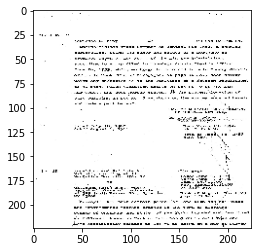

[[2.6297874e-07 9.9999982e-01]]
Not Blank
test_63.jpeg


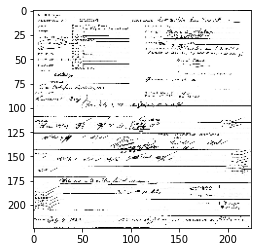

[[1.9038328e-08 1.0000000e+00]]
Not Blank
test_64.jpeg


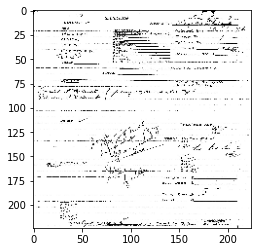

[[2.2725468e-09 1.0000000e+00]]
Not Blank
test_65.jpeg


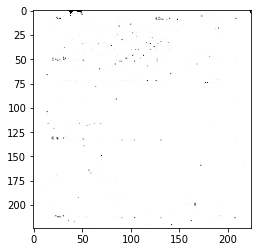

[[0.99993193 0.00252643]]
Blank
test_66.jpeg


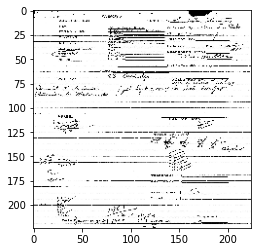

[[4.833385e-06 9.999989e-01]]
Not Blank
test_67.jpeg


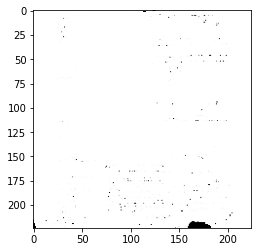

[[0.999595   0.00848106]]
Blank
test_68.jpeg


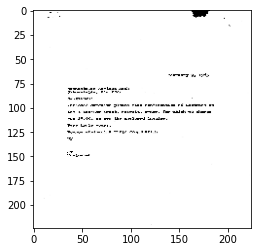

[[8.6267545e-07 9.9999201e-01]]
Not Blank
test_69.jpeg


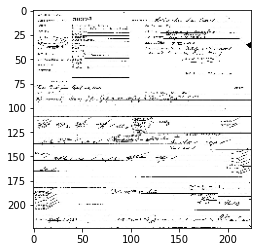

[[2.8543622e-07 1.0000000e+00]]
Not Blank
test_7.jpeg


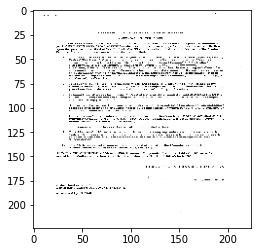

[[2.8960413e-08 1.0000000e+00]]
Not Blank
test_70.jpeg


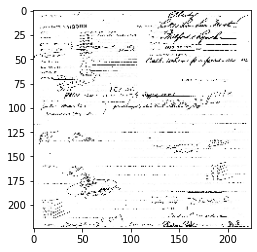

[[3.563877e-06 9.999987e-01]]
Not Blank
test_71.jpeg


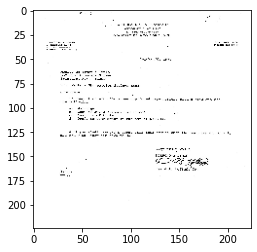

[[1.5262201e-06 9.9999905e-01]]
Not Blank
test_72.jpeg


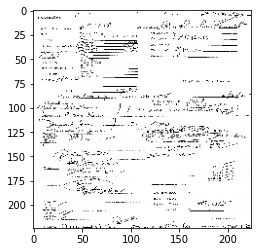

[[1.8139943e-08 1.0000000e+00]]
Not Blank
test_73.jpeg


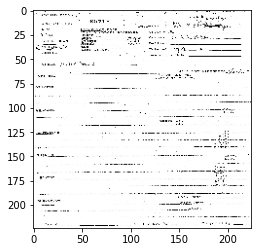

[[0.02895868 0.9983206 ]]
Not Blank
test_74.jpeg


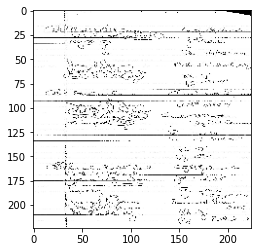

[[8.5036270e-05 9.9999416e-01]]
Not Blank
test_75.jpeg


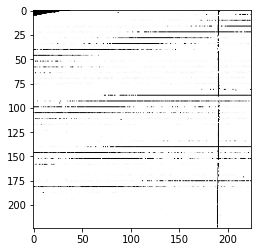

[[0.9996847  0.01177737]]
Blank
test_76.jpeg


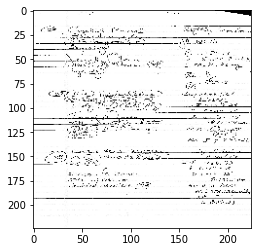

[[4.2399145e-07 1.0000000e+00]]
Not Blank
test_77.jpeg


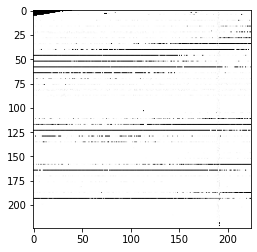

[[9.999948e-01 8.484125e-04]]
Blank
test_78.jpeg


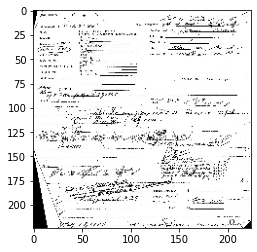

[[1.5932109e-08 1.0000000e+00]]
Not Blank
test_79.jpeg


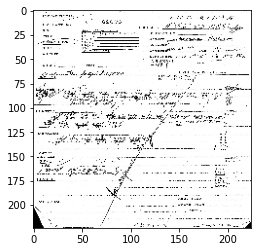

[[1.4470163e-10 1.0000000e+00]]
Not Blank
test_8.jpeg


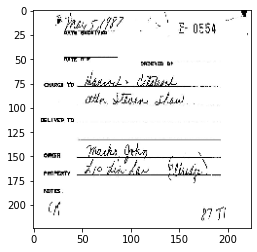

[[2.4614767e-06 9.9999976e-01]]
Not Blank
test_80.jpeg


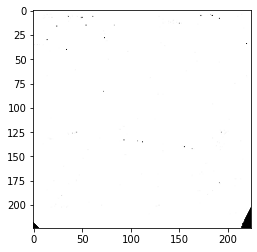

[[0.9998821  0.00117594]]
Blank
test_81.jpeg


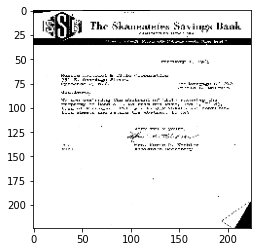

[[2.1116591e-07 1.0000000e+00]]
Not Blank
test_82.jpeg


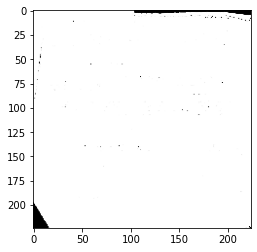

[[0.99789685 0.02730715]]
Blank
test_83.jpeg


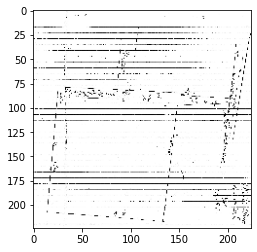

[[0.0077489  0.99935675]]
Not Blank
test_84.jpeg


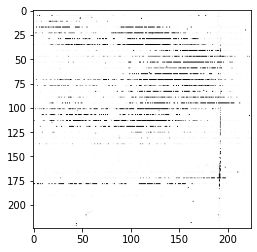

[[0.95735496 0.36875546]]
Blank
test_85.jpeg


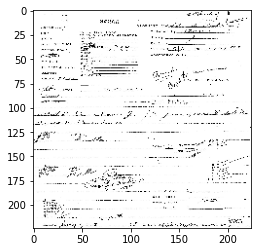

[[8.6904112e-07 9.9999607e-01]]
Not Blank
test_86.jpeg


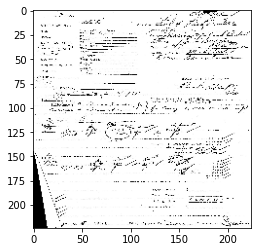

[[4.2951843e-08 9.9999970e-01]]
Not Blank
test_87.jpeg


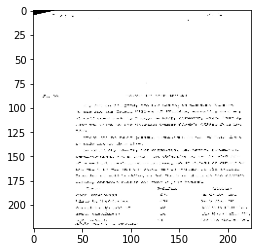

[[5.988677e-07 9.999983e-01]]
Not Blank
test_88.jpeg


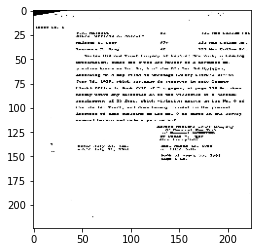

[[6.6624544e-08 9.9999964e-01]]
Not Blank
test_89.jpeg


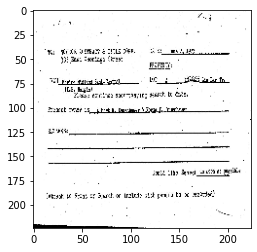

[[2.6207281e-06 9.9999976e-01]]
Not Blank
test_9.jpeg


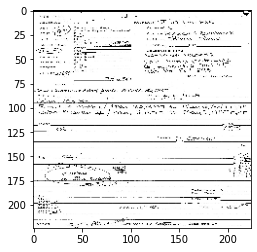

[[6.449803e-08 1.000000e+00]]
Not Blank
test_90.jpeg


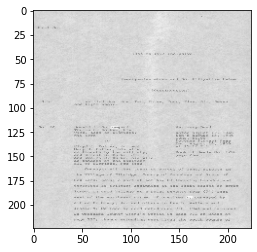

[[1.6922725e-06 9.9999845e-01]]
Not Blank
test_91.jpeg


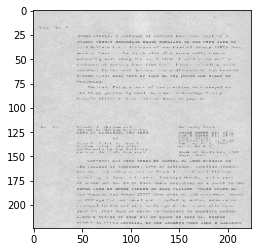

[[2.0575523e-04 9.9988717e-01]]
Not Blank
test_92.jpeg


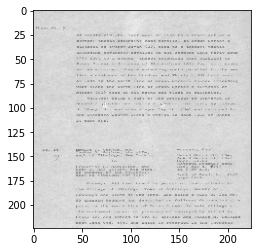

[[1.8581290e-05 9.9998224e-01]]
Not Blank
test_93.jpeg


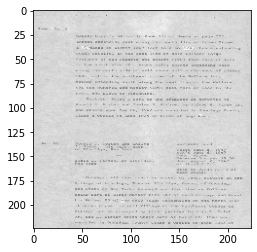

[[0.0011923  0.99879885]]
Not Blank
test_94.jpeg


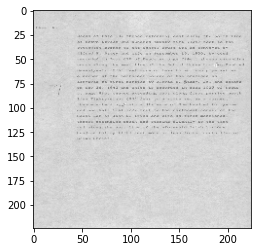

[[3.4878799e-06 9.9999845e-01]]
Not Blank
test_95.jpeg


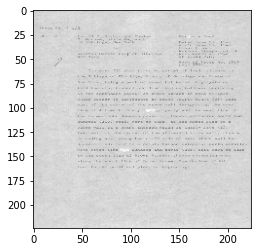

[[2.6461482e-04 9.9988425e-01]]
Not Blank
test_96.jpeg


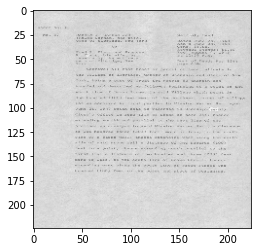

[[8.0481896e-06 9.9999446e-01]]
Not Blank
test_97.jpeg


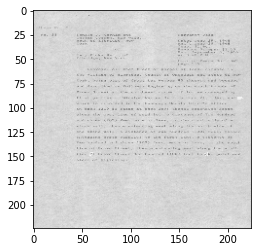

[[1.14893034e-07 1.00000000e+00]]
Not Blank
test_98.jpeg


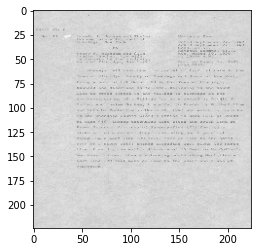

[[4.8265563e-05 9.9997640e-01]]
Not Blank
test_99.jpeg


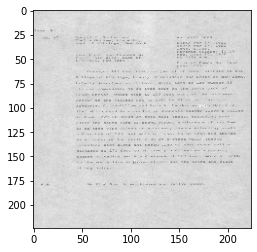

[[2.4846568e-07 9.9999976e-01]]
Not Blank


File_Name     Result
0      test_0.jpeg  Not Blank
1      test_1.jpeg  Not Blank
2     test_10.jpeg  Not Blank
3    test_100.jpeg  Not Blank
4    test_101.jpeg  Not Blank
5    test_102.jpeg  Not Blank
6    test_103.jpeg  Not Blank
7    test_104.jpeg  Not Blank
8    test_105.jpeg  Not Blank
9    test_106.jpeg  Not Blank
10   test_107.jpeg  Not Blank
11   test_108.jpeg  Not Blank
12   test_109.jpeg  Not Blank
13    test_11.jpeg  Not Blank
14   test_110.jpeg  Not Blank
15   test_111.jpeg  Not Blank
16   test_112.jpeg  Not Blank
17   test_113.jpeg  Not Blank
18   test_114.jpeg  Not Blank
19   test_115.jpeg  Not Blank
20   test_116.jpeg  Not Blank
21   test_117.jpeg  Not Blank
22    test_12.jpeg  Not Blank
23    test_13.jpeg  Not Blank
24    test_14.jpeg  Not Blank
25    test_15.jpeg  Not Blank
26    test_16.jpeg  Not Blank
27    test_17.jpeg      Blank
28    test_18.jpeg  Not Blank
29    test_19.jpeg  Not Blank
30     test_2.jpeg  Not Blank
31    test_20.jpeg  Not Blank
32    test_21.jpeg      Blank
33    test_22.jpeg  Not Blank
34    test_23.jpeg      Blank
35    test_24.jpeg  Not Blank
36    test_25.jpeg      Blank
37    test_26.jpeg  Not Blank
38    test_27.jpeg  Not Blank
39    test_28.jpeg  Not Blank
40    test_29.jpeg  Not Blank
41     test_3.jpeg  Not Blank
42    test_30.jpeg      Blank
43    test_31.jpeg  Not Blank
44    test_32.jpeg      Blank
45    test_33.jpeg  Not Blank
46    test_34.jpeg      Blank
47    test_35.jpeg  Not Blank
48    test_36.jpeg      Blank
49    test_37.jpeg  Not Blank
50    test_38.jpeg      Blank
51    test_39.jpeg  Not Blank
52     test_4.jpeg  Not Blank
53    test_40.jpeg      Blank
54    test_41.jpeg  Not Blank
55    test_42.jpeg      Blank
56    test_43.jpeg  Not Blank
57    test_44.jpeg  Not Blank
58    test_45.jpeg  Not Blank
59    test_46.jpeg      Blank
60    test_47.jpeg  Not Blank
61    test_48.jpeg  Not Blank
62    test_49.jpeg  Not Blank
63     test_5.jpeg  Not Blank
64    test_50.jpeg  Not Blank
65    test_52.jpeg      Blank
66    test_53.jpeg  Not Blank
67    test_54.jpeg  Not Blank
68    test_55.jpeg  Not Blank
69    test_56.jpeg      Blank
70    test_57.jpeg  Not Blank
71    test_58.jpeg  Not Blank
72    test_59.jpeg  Not Blank
73     test_6.jpeg  Not Blank
74    test_60.jpeg  Not Blank
75    test_61.jpeg  Not Blank
76    test_62.jpeg  Not Blank
77    test_63.jpeg  Not Blank
78    test_64.jpeg  Not Blank
79    test_65.jpeg      Blank
80    test_66.jpeg  Not Blank
81    test_67.jpeg      Blank
82    test_68.jpeg  Not Blank
83    test_69.jpeg  Not Blank
84     test_7.jpeg  Not Blank
85    test_70.jpeg  Not Blank
86    test_71.jpeg  Not Blank
87    test_72.jpeg  Not Blank
88    test_73.jpeg  Not Blank
89    test_74.jpeg  Not Blank
90    test_75.jpeg      Blank
91    test_76.jpeg  Not Blank
92    test_77.jpeg      Blank
93    test_78.jpeg  Not Blank
94    test_79.jpeg  Not Blank
95     test_8.jpeg  Not Blank
96    test_80.jpeg      Blank
97    test_81.jpeg  Not Blank
98    test_82.jpeg      Blank
99    test_83.jpeg  Not Blank
100   test_84.jpeg      Blank
101   test_85.jpeg  Not Blank
102   test_86.jpeg  Not Blank
103   test_87.jpeg  Not Blank
104   test_88.jpeg  Not Blank
105   test_89.jpeg  Not Blank
106    test_9.jpeg  Not Blank
107   test_90.jpeg  Not Blank
108   test_91.jpeg  Not Blank
109   test_92.jpeg  Not Blank
110   test_93.jpeg  Not Blank
111   test_94.jpeg  Not Blank
112   test_95.jpeg  Not Blank
113   test_96.jpeg  Not Blank
114   test_97.jpeg  Not Blank
115   test_98.jpeg  Not Blank
116   test_99.jpeg  Not Blank

43.43459606170654


In [75]:
import time

start = time.time()

path = '/home/vimalkumar/Downloads/new_project (copy)/cnn validation/testing-3'


file_name = []
result = []


for im in sorted(os.listdir(path)):
    print(im)
    img = image.load_img(os.path.join(path,im),
                     target_size=(224,224))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = x/255
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    print(val)

    a=np.argmax(val,axis=1)
    print(dic[a[0]])
    file_name.append(im)
    result.append(dic[a[0]])
    
df = pd.DataFrame({'File_Name':file_name,'Result':result})
pd.set_option('display.max_rows',1000)
df.to_excel('/home/vimalkumar/Downloads/new_project (copy)/cnn validation/cnn_result_3.xlsx')
display(df) 

end = time.time()

print(end - start)